# Cancellations & Returns Analysis

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 6)

In [35]:
df = pd.read_csv('../data/processed/online_retail_cleaned.csv')


### 1. Cancellation Rate

In [36]:
# Question: How many invoices are cancelled vs completed?

# Total invoices
total_invoices = df['InvoiceNo'].nunique()

# Cancelled invoices
cancelled_invoices = df[df['IsCancellation'] == True]['InvoiceNo'].nunique()

# Cancellation rate
cancellation_rate = (cancelled_invoices / total_invoices) * 100

total_invoices, cancelled_invoices, cancellation_rate


(25900, 3836, 14.810810810810812)

In [37]:
# Question: How much revenue is lost due to cancellations?

# Revenue from cancelled invoices
cancelled_revenue = df[df['IsCancellation'] == True]['TotalPrice'].sum()

# Total revenue
total_revenue = df['TotalPrice'].sum()

# Percentage revenue loss
revenue_loss_pct = (cancelled_revenue / total_revenue) * 100

cancelled_revenue, total_revenue, revenue_loss_pct

(np.float64(-893979.73),
 np.float64(9726006.954),
 np.float64(-9.191641896084953))

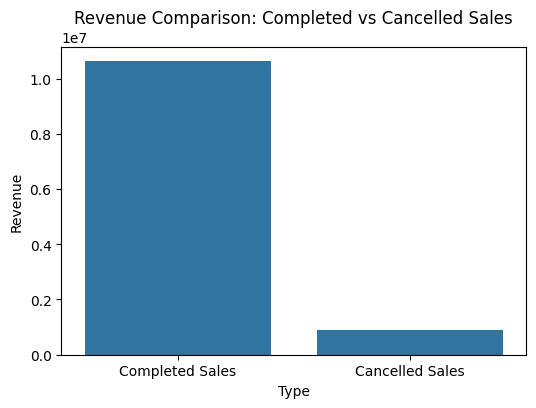

In [38]:
# Question: How does cancelled vs completed revenue compare?

revenue_comparison = pd.DataFrame({
    'Type': ['Completed Sales', 'Cancelled Sales'],
    'Revenue': [
        df[df['IsCancellation'] == False]['TotalPrice'].sum(),
        abs(df[df['IsCancellation'] == True]['TotalPrice'].sum())
    ]
})

plt.figure(figsize=(6,4))
sns.barplot(data=revenue_comparison, x='Type', y='Revenue')
plt.title('Revenue Comparison: Completed vs Cancelled Sales')
plt.ylabel('Revenue')
plt.show()


### 2. Cancellation Reasons Analysis

In [39]:
#Question: Which products have the highest cancellation rates?
# Filter cancelled transactions
cancelled_df = df[df['IsCancellation'] == True].copy()

# Product-level cancellation analysis
cancelled_products = (
    cancelled_df
    .groupby(['StockCode'])
    .agg(
        Cancelled_Quantity=('Quantity', 'sum'),
        Revenue_Lost=('TotalPrice', 'sum')
    )
    .sort_values('Revenue_Lost')
)

cancelled_products.head(10)


,Cancelled_Quantity,Revenue_Lost
StockCode,,
AMAZONFEE,-32,-235281.59
23843,-80995,-168469.60
M,-4066,-146784.46
23166,-74494,-77479.64
POST,-147,-11871.24
22423,-855,-9697.05
CRUK,-16,-7933.43
BANK CHARGES,-25,-7340.64
85123A,-2578,-6624.30


In [40]:
# Filter cancelled transactions
cancelled_df = df[df['IsCancellation'] == True].copy()

# Total cancelled quantity per product
cancelled_products_qty = (
    cancelled_df
    .groupby('StockCode')
    .agg(Cancelled_Quantity=('Quantity', 'sum'))
)


# Sort by absolute cancelled quantity (largest cancellations first)
cancelled_products['Abs_Cancelled_Quantity'] = (
    cancelled_products['Cancelled_Quantity'].abs()
)

top_10_cancelled = (
    cancelled_products
    .sort_values('Abs_Cancelled_Quantity', ascending=False)
    .head(10)
)

top_10_cancelled


,Cancelled_Quantity,Revenue_Lost,Abs_Cancelled_Quantity
StockCode,,,
23843,-80995,-168469.60,80995
23166,-74494,-77479.64,74494
84347,-9376,-321.60,9376
M,-4066,-146784.46,4066
21108,-3150,-6591.42,3150
85123A,-2578,-6624.30,2578
21175,-2030,-3775.33,2030
22920,-1527,-841.05,1527
22273,-1447,-3512.65,1447


### 3. Countries Having the Highest Cancellation Rates

In [41]:
country_cancellations = (
    df
    .groupby('Country')
    .agg(
        Total_Transactions=('InvoiceNo', 'count'),
        Cancelled_Transactions=('IsCancellation', 'sum')
    )
)

country_cancellations['Cancellation_Rate (%)'] = (
    country_cancellations['Cancelled_Transactions'] /
    country_cancellations['Total_Transactions'] * 100
)

country_cancellations.sort_values('Cancellation_Rate (%)', ascending=False).head(10)


,Total_Transactions,Cancelled_Transactions,Cancellation_Rate (%)
Country,,,
USA,291,112,38.487973
Czech Republic,30,5,16.666667
Malta,127,15,11.811024
Japan,358,37,10.335196
Saudi Arabia,10,1,10.000000
Australia,1258,74,5.882353
Italy,803,45,5.603985
Bahrain,19,1,5.263158
Germany,9480,453,4.778481


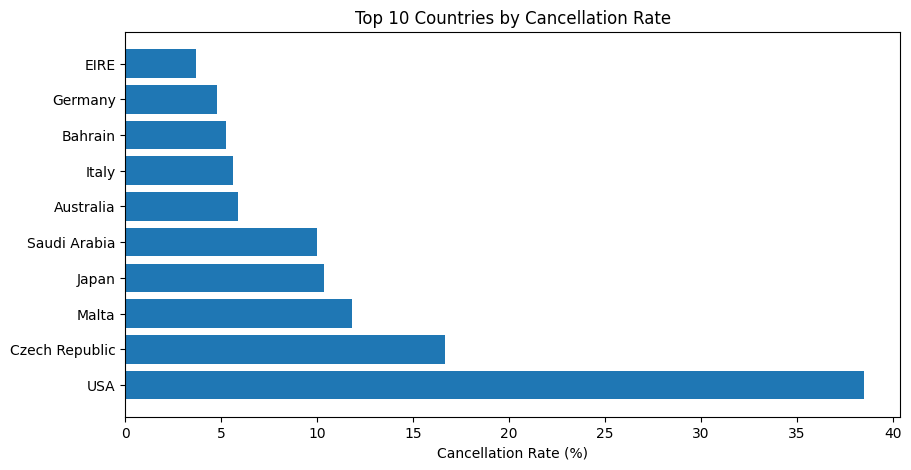

In [42]:
top_countries = country_cancellations.sort_values(
    'Cancellation_Rate (%)', ascending=False
).head(10)

plt.figure(figsize=(10,5))
plt.barh(top_countries.index, top_countries['Cancellation_Rate (%)'])
plt.title('Top 10 Countries by Cancellation Rate')
plt.xlabel('Cancellation Rate (%)')
plt.show()


### 4. Top customers with Cancellations

In [ ]:
cancelled_df = df[df['IsCancellation'] == True].copy()

# Aggregate cancelled quantity per customer
top_customers_qty = (
    cancelled_df
    .groupby('CustomerID')
    .agg(Cancelled_Quantity=('Quantity', 'sum'))
    .sort_values('Cancelled_Quantity', ascending=True)
    .reset_index()
)

top_customers_qty.head(10)


,CustomerID,Cancelled_Quantity
0,16446.0,-80995
1,12346.0,-74215
2,15838.0,-9361
3,15749.0,-9014
4,16029.0,-6476
5,12931.0,-4627
6,14607.0,-3768
7,14911.0,-3335
8,17949.0,-2975
9,ANONYMOUS,-2525


In [54]:
# Aggregate cancelled revenue per customer
top_customers_rev = (
    cancelled_df
    .groupby('CustomerID')
    .agg(Revenue_Lost=('TotalPrice', 'sum'))
    .sort_values('Revenue_Lost', ascending=True)
    .reset_index()
)

top_customers_rev.head(10)


,CustomerID,Revenue_Lost
0,ANONYMOUS,-285290.26
1,16446.0,-168469.60
2,12346.0,-77183.60
3,15098.0,-39267.00
4,16029.0,-27682.15
5,15749.0,-22998.40
6,12744.0,-12158.90
7,14911.0,-11252.44
8,12931.0,-8593.15
9,12536.0,-8495.01
